KNN for Imputation


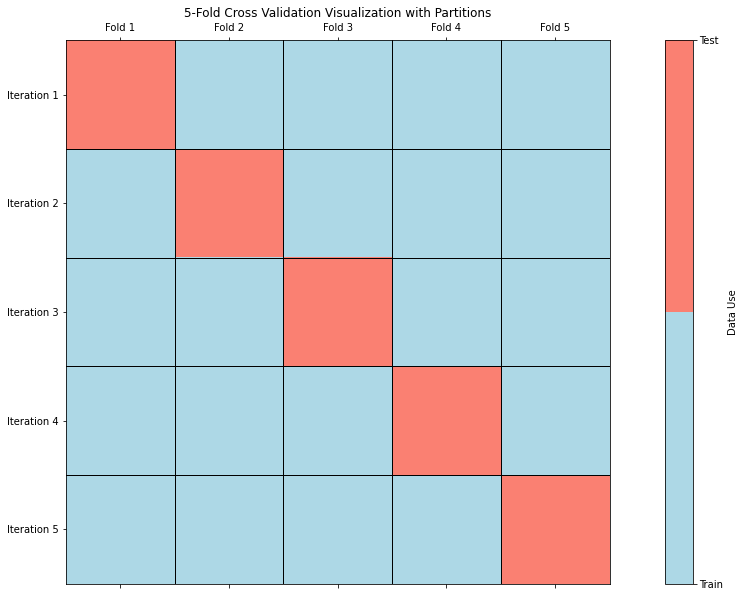

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Create a 5x5 grid to represent 5 folds across 5 iterations
data = np.zeros((5, 5))

# Define folds; each column is an iteration, each row a fold
for i in range(5):
    data[:, i] = 1  # All folds used for training initially
    data[i, i] = 2  # Highlight test fold

fig, ax = plt.subplots(figsize=(20, 10))
cmap = ListedColormap(['lightblue', 'salmon'])  # Light blue for train, salmon for test
cax = ax.matshow(data, cmap=cmap)

# Draw grid lines to separate folds visually
for i in range(4):
    ax.axhline(i + 0.5, color='black', linewidth=1)
    ax.axvline(i + 0.5, color='black', linewidth=1)

# Annotations
cols = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']
rows = ['Iteration 1', 'Iteration 2', 'Iteration 3', 'Iteration 4', 'Iteration 5']

ax.set_xticks(np.arange(len(cols)))
ax.set_yticks(np.arange(len(rows)))
ax.set_xticklabels(cols)
ax.set_yticklabels(rows)

# Adding color bar to indicate training and testing
plt.colorbar(cax, ticks=[1, 2], label='Data Use', format=plt.FuncFormatter(lambda x, pos: 'Test' if x == 2 else 'Train'))
plt.title('5-Fold Cross Validation Visualization with Partitions')
plt.show()


In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Initialize the Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier()

# Perform 5-fold cross-validation
accuracy_scores = cross_val_score(decision_tree_model, X, y, cv=5)

# Print the accuracy for each fold
print("Accuracy scores for each fold:", accuracy_scores)

# Calculate and print the average accuracy
average_accuracy = accuracy_scores.mean()
print("Average accuracy:", average_accuracy)


Accuracy scores for each fold: [0.96666667 0.96666667 0.9        1.         1.        ]
Average accuracy: 0.9666666666666668


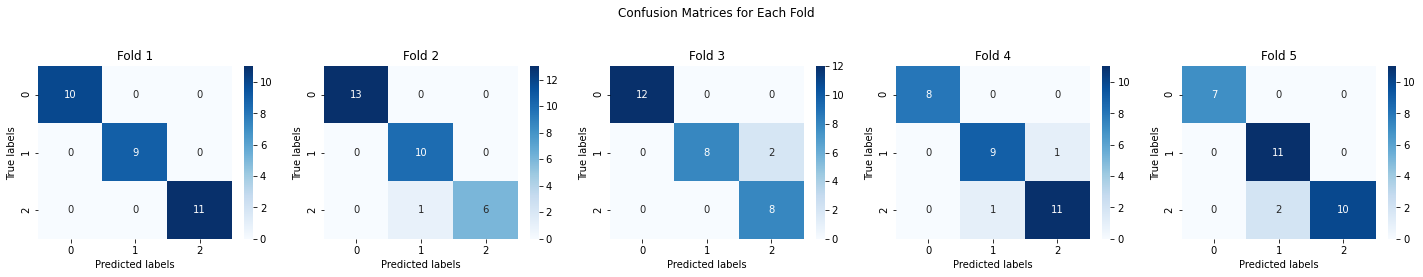

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Initialize the Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier()

# Prepare KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize a counter for the fold number
fold = 1

# Set up the plot for confusion matrices
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
fig.suptitle('Confusion Matrices for Each Fold')

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    decision_tree_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = decision_tree_model.predict(X_test)

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    sns.heatmap(cm, annot=True, ax=axes[fold-1], fmt='g', cmap='Blues')
    axes[fold-1].set_title(f'Fold {fold}')
    axes[fold-1].set_xlabel('Predicted labels')
    axes[fold-1].set_ylabel('True labels')

    # Increment the fold number
    fold += 1

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Lets modify the Python script to use a randomly chosen random_state, utilize StratifiedKFold for cross-validation (which maintains the proportion of each class in every fold), and report both the accuracy and plot the confusion matrices for each fold. This approach ensures a more uniform distribution of classes across the folds and provides a clearer assessment of the model's performance.

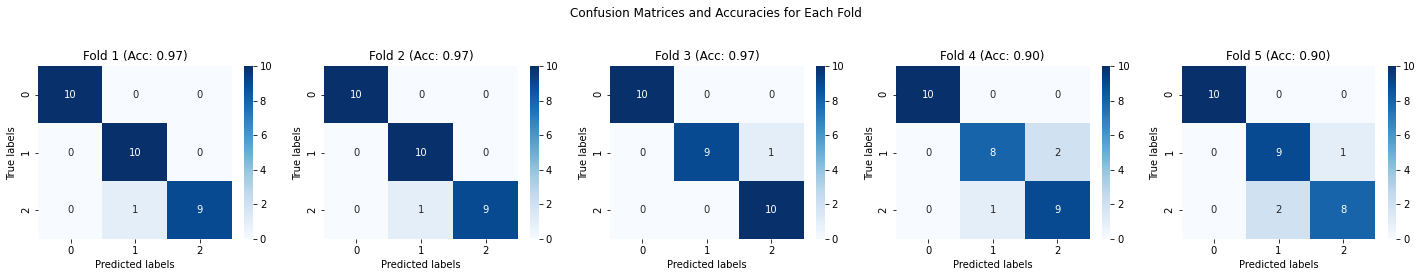

Accuracy scores for each fold: [0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9, 0.9]
Average accuracy: 0.9400000000000001


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import random

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Initialize the Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier()

# Prepare StratifiedKFold cross-validation
random_state = random.randint(0, 99999)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

# Initialize lists to collect fold results
confusion_matrices = []
accuracies = []

# Set up the plot for confusion matrices
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
fig.suptitle('Confusion Matrices and Accuracies for Each Fold')

# Perform StratifiedKFold cross-validation
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    decision_tree_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = decision_tree_model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)

    # Plot the confusion matrix
    sns.heatmap(cm, annot=True, ax=axes[i], fmt='g', cmap='Blues')
    axes[i].set_title(f'Fold {i+1} (Acc: {accuracy:.2f})')
    axes[i].set_xlabel('Predicted labels')
    axes[i].set_ylabel('True labels')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Print accuracies
print("Accuracy scores for each fold:", accuracies)
print("Average accuracy:", np.mean(accuracies))


# **Principal Component Analysis**

---
We load the wine dataset from sklearn and visualize the data using the first two components.



Number of samples in the wine dataset: 178
Number of features: 13


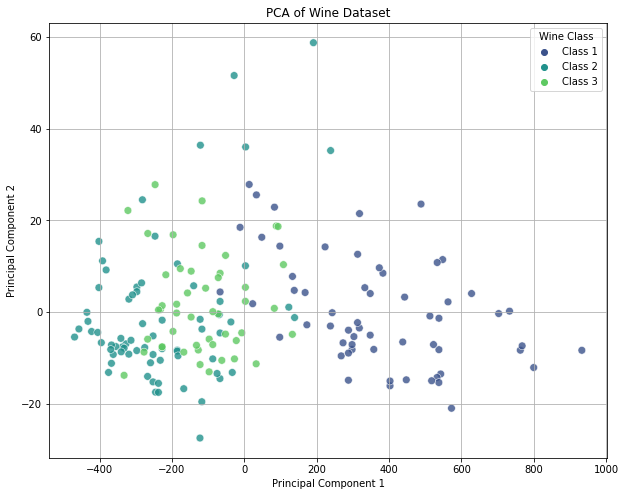

In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns

# Load the wine dataset
wine = load_wine()
X = wine.data
y = wine.target

num_samples, num_features = X.shape

# Print the results
print("Number of samples in the wine dataset:", num_samples)
print("Number of features:", num_features)

features = wine.feature_names

# Perform PCA to reduce to two dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a DataFrame with the PCA results
wine_pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
wine_pca_df['Target'] = y

# Map targets to names for better visualization
target_names = {0: 'Class 1', 1: 'Class 2', 2: 'Class 3'}
wine_pca_df['Target Name'] = wine_pca_df['Target'].map(target_names)

# Plotting the results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Target Name', data=wine_pca_df, palette='viridis', alpha=0.8, s=60)
plt.title('PCA of Wine Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Wine Class')
plt.grid(True)
plt.show()


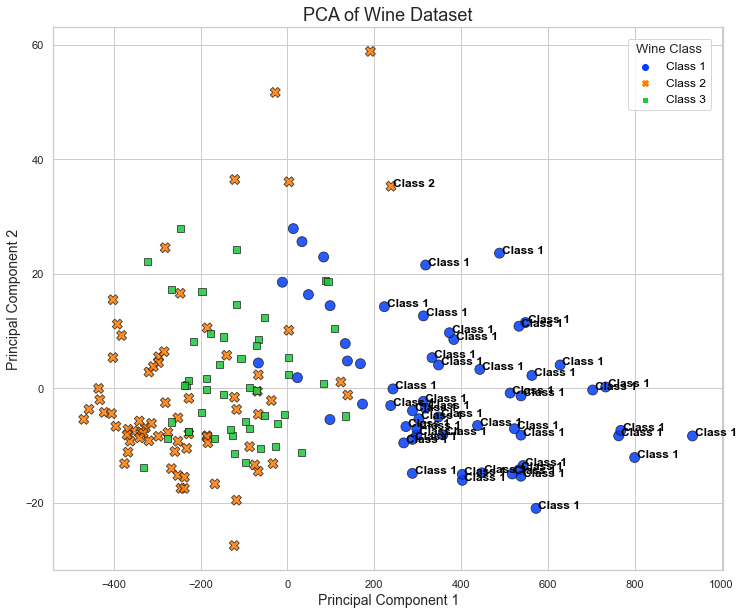

In [7]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns

# Load the wine dataset
wine = load_wine()
X = wine.data
y = wine.target
features = wine.feature_names

# Perform PCA to reduce to two dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a DataFrame with the PCA results
wine_pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
wine_pca_df['Target'] = y

# Map targets to names for better visualization
target_names = {0: 'Class 1', 1: 'Class 2', 2: 'Class 3'}
wine_pca_df['Target Name'] = wine_pca_df['Target'].map(target_names)

# Setting up the seaborn plot style
sns.set(style="whitegrid", palette="muted")

# Plotting the results with enhanced visuals
plt.figure(figsize=(12, 10))
scatter = sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Target Name', data=wine_pca_df, style='Target Name', palette='bright', s=100, alpha=0.85, edgecolor='k')

# Enhancing plot details
plt.title('PCA of Wine Dataset', fontsize=18)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
legend = plt.legend(title='Wine Class', title_fontsize='13', fontsize='12', loc='upper right', borderaxespad=1)
plt.setp(legend.get_texts(), color='black')

# Adding annotations for outlier points or important observations
for line in range(0, wine_pca_df.shape[0]):
    if (wine_pca_df['Principal Component 1'][line] > 200) or (wine_pca_df['Principal Component 2'][line] > 80):
        plt.text(wine_pca_df['Principal Component 1'][line]+5, wine_pca_df['Principal Component 2'][line], wine_pca_df['Target Name'][line], horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.show()


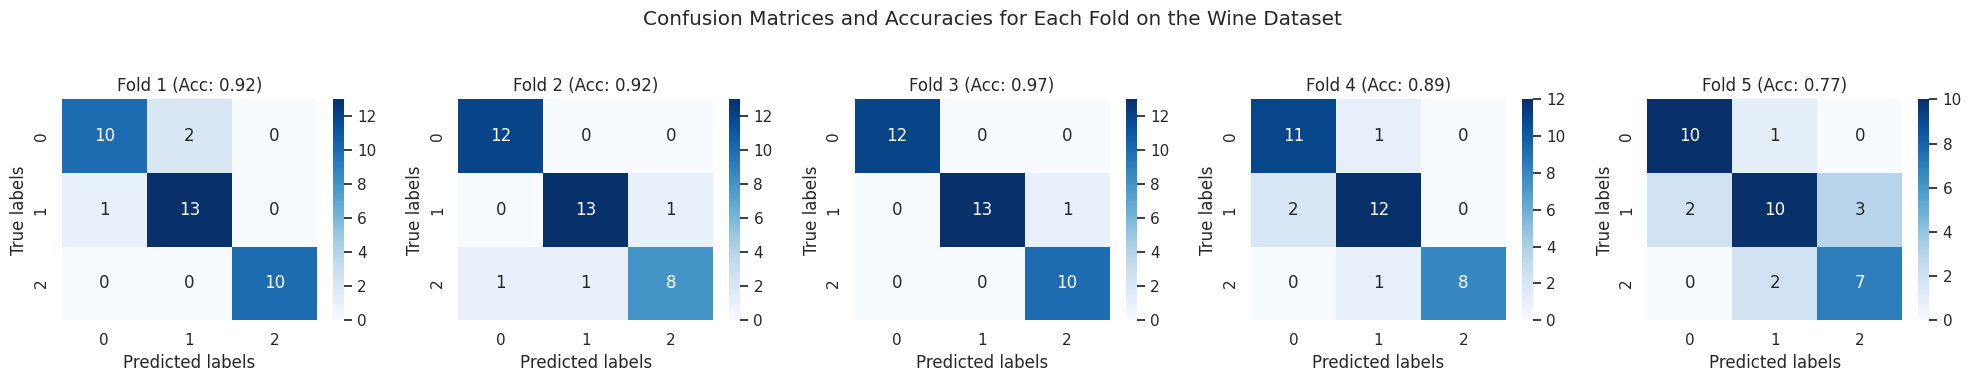

Accuracy scores for each fold: [0.9166666666666666, 0.9166666666666666, 0.9722222222222222, 0.8857142857142857, 0.7714285714285715]
Average accuracy: 0.8925396825396825


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import random

# Load the wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Initialize the Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier()

# Prepare StratifiedKFold cross-validation
random_state = random.randint(0, 99999)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

# Initialize lists to collect fold results
confusion_matrices = []
accuracies = []

# Set up the plot for confusion matrices
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
fig.suptitle('Confusion Matrices and Accuracies for Each Fold on the Wine Dataset')

# Perform StratifiedKFold cross-validation
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    decision_tree_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = decision_tree_model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)

    # Plot the confusion matrix
    sns.heatmap(cm, annot=True, ax=axes[i], fmt='g', cmap='Blues')
    axes[i].set_title(f'Fold {i+1} (Acc: {accuracy:.2f})')
    axes[i].set_xlabel('Predicted labels')
    axes[i].set_ylabel('True labels')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Print accuracies
print("Accuracy scores for each fold:", accuracies)
print("Average accuracy:", np.mean(accuracies))


Lets use the first three principle components and then visualize the data

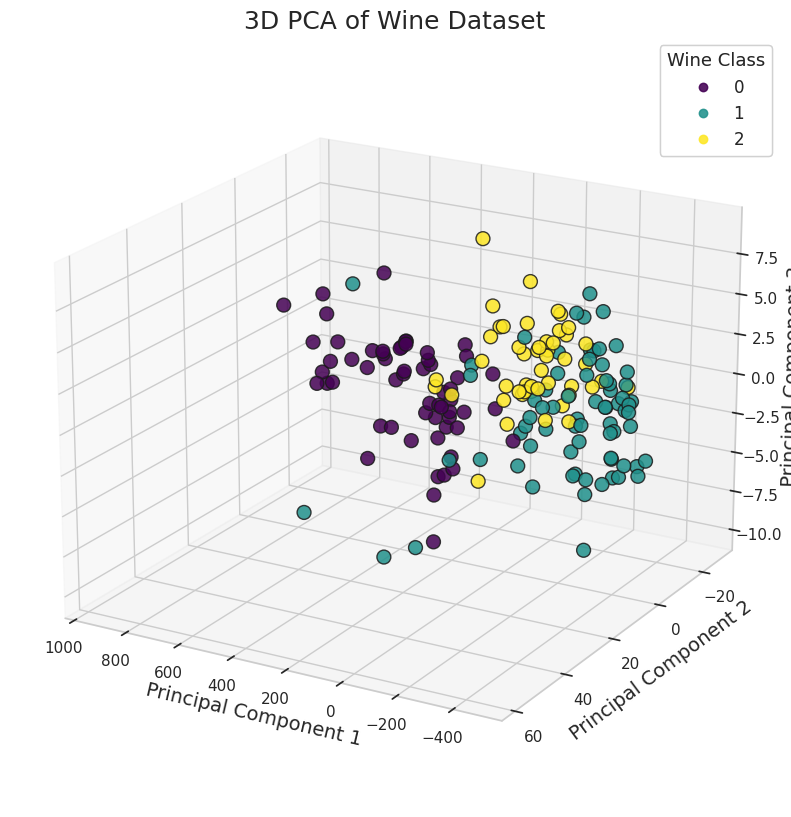

In [9]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D  # Import the 3D plotting tool

# Load the wine dataset
wine = load_wine()
X = wine.data
y = wine.target
features = wine.feature_names

# Perform PCA to reduce to three dimensions
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Create a DataFrame with the PCA results
wine_pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])
wine_pca_df['Target'] = y

# Map targets to names for better visualization
target_names = {0: 'Class 1', 1: 'Class 2', 2: 'Class 3'}
wine_pca_df['Target Name'] = wine_pca_df['Target'].map(target_names)

# Setting up the seaborn plot style
sns.set(style="whitegrid", palette="muted")

# Plotting the results with enhanced visuals in 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(wine_pca_df['Principal Component 1'],
                     wine_pca_df['Principal Component 2'],
                     wine_pca_df['Principal Component 3'],
                     c=wine_pca_df['Target'],
                     cmap='viridis',
                     s=100,
                     edgecolor='k',
                     alpha=0.85)

# Enhancing plot details
ax.set_title('3D PCA of Wine Dataset', fontsize=18)
ax.set_xlabel('Principal Component 1', fontsize=14)
ax.set_ylabel('Principal Component 2', fontsize=14)
ax.set_zlabel('Principal Component 3', fontsize=14)
legend = ax.legend(*scatter.legend_elements(), title='Wine Class', title_fontsize='13', fontsize='12', loc='upper right')
ax.add_artist(legend)

# Optional: rotate the viewpoint for better visibility
ax.view_init(elev=20, azim=120)  # Adjust these angles to find the best view

plt.show()


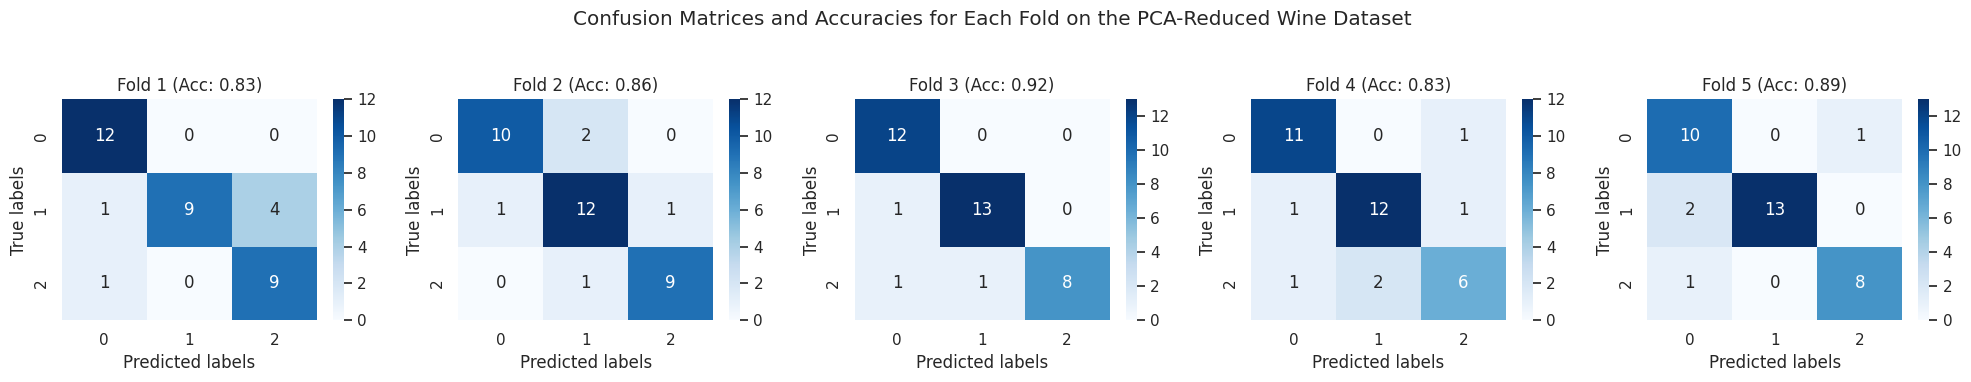

Accuracy scores for each fold: [0.8333333333333334, 0.8611111111111112, 0.9166666666666666, 0.8285714285714286, 0.8857142857142857]
Average accuracy: 0.8650793650793652


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import random
from sklearn.preprocessing import StandardScaler


# Load the wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Standardize the dataset
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Apply PCA to reduce dimensions to three principal components
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X)

# Initialize the Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier()

# Prepare StratifiedKFold cross-validation
random_state = random.randint(0, 99999)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

# Initialize lists to collect fold results
confusion_matrices = []
accuracies = []

# Set up the plot for confusion matrices
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
fig.suptitle('Confusion Matrices and Accuracies for Each Fold on the PCA-Reduced Wine Dataset')

# Perform StratifiedKFold cross-validation using the PCA-reduced dataset
for i, (train_index, test_index) in enumerate(skf.split(X_pca, y)):
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    decision_tree_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = decision_tree_model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)

    # Plot the confusion matrix
    sns.heatmap(cm, annot=True, ax=axes[i], fmt='g', cmap='Blues')
    axes[i].set_title(f'Fold {i+1} (Acc: {accuracy:.2f})')
    axes[i].set_xlabel('Predicted labels')
    axes[i].set_ylabel('True labels')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Print accuracies
print("Accuracy scores for each fold:", accuracies)
print("Average accuracy:", np.mean(accuracies))
